   Temp  Time     Volume
0   100    10  21.624345
1   100    10  19.388244
2   100    10  19.471828
3   100    10  18.927031
4   100    10  20.865408 (40, 3)


/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35069 (\N{CJK UNIFIED IDEOGRAPH-88FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pyl

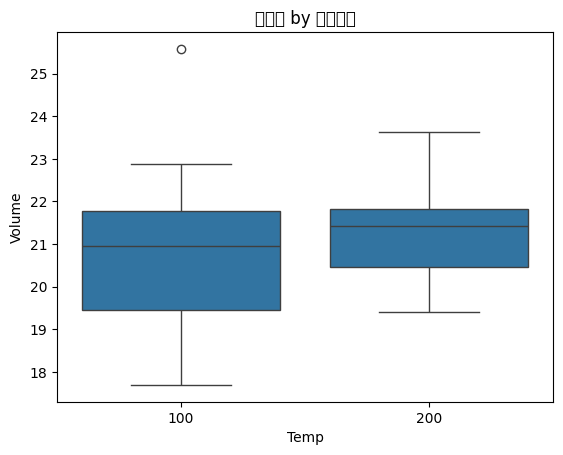

/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35069 (\N{CJK UNIFIED IDEOGRAPH-88FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uetsuki/Desktop/dsdev/.venv/lib/python3.11/site-packages/IPython/core/pyl

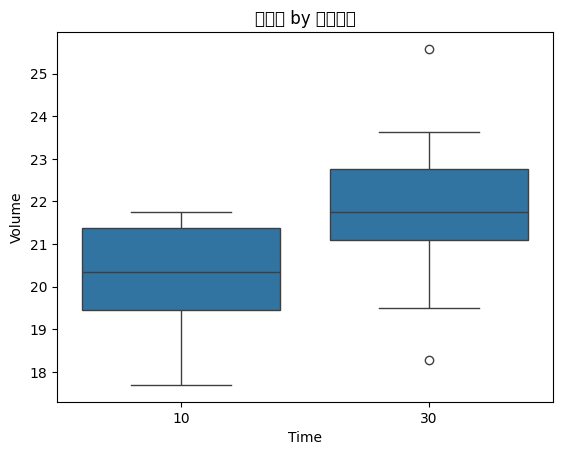

全体平均: 21.064619498696487
温度条件ごとの平均:
 Temp
100    20.810951
200    21.318288
Name: Volume, dtype: float64
反応時間ごとの平均:
 Time
10    20.320478
30    21.808761
Name: Volume, dtype: float64

ANOVA (二元分散分析):
              sum_sq    df          F    PR(>F)
C(Temp)    2.573902   1.0   1.441871  0.237468
C(Time)   22.149872   1.0  12.408114  0.001156
Residual  66.049143  37.0        NaN       NaN
C(Temp): p=0.2375 >= 0.05 → 帰無仮説を棄却しない（差なし）
C(Time): p=0.001156 < 0.05 → 帰無仮説を棄却（差あり）


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1) データ読み込み＆確認
df = pd.read_csv("reagents_data.csv")
print(df.head(), df.shape)

# 2) 箱ひげ図（温度ごと / 時間ごと）
sns.boxplot(x="Temp", y="Volume", data=df)
plt.title("製造量 by 温度条件")
plt.show()

sns.boxplot(x="Time", y="Volume", data=df)
plt.title("製造量 by 反応時間")
plt.show()

# 3) 平均値の計算
grand_mean = df["Volume"].mean()
mean_by_temp = df.groupby("Temp")["Volume"].mean()
mean_by_time = df.groupby("Time")["Volume"].mean()

print("全体平均:", grand_mean)
print("温度条件ごとの平均:\n", mean_by_temp)
print("反応時間ごとの平均:\n", mean_by_time)

# 4) 二元分散分析 (statsmodels)
# TempとTimeを因子としてVolumeを説明変数に
model = ols("Volume ~ C(Temp) + C(Time)", data=df).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print("\nANOVA (二元分散分析):\n", anova_tbl)

# 5) 判定（有意水準5%）
alpha = 0.05
for factor in ["C(Temp)", "C(Time)"]:
    pval = anova_tbl.loc[factor, "PR(>F)"]
    if pval < alpha:
        print(f"{factor}: p={pval:.4g} < 0.05 → 帰無仮説を棄却（差あり）")
    else:
        print(f"{factor}: p={pval:.4g} >= 0.05 → 帰無仮説を棄却しない（差なし）")
